In [36]:
import os
from utils.configuration import *
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [37]:
experiment_name = "api_ordinal_wine_example"      ## <--- set experiment name
LOG_DIR="/home/bule/TramDag/dev_experiment_logs"  ## <--- set log directory
EXPERIMENT_DIR = os.path.join(LOG_DIR, experiment_name)
CONF_DICT_PATH = os.path.join(EXPERIMENT_DIR, f"configuration.json")

In [38]:
setup_configuration(experiment_name,EXPERIMENT_DIR)

Configuration already exists/home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/configuration.json


In [ ]:
# Load the dataset
wine = load_wine()

df=pd.DataFrame(wine['data'], columns=wine['feature_names'])
df['target']=wine['target']
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [41]:
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [42]:
data_type={key:value for key, value in zip(train_df.columns, ['continous']*13+['ordinal_Xc_Yo'])}
data_type

{'alcohol': 'continous',
 'malic_acid': 'continous',
 'ash': 'continous',
 'alcalinity_of_ash': 'continous',
 'magnesium': 'continous',
 'total_phenols': 'continous',
 'flavanoids': 'continous',
 'nonflavanoid_phenols': 'continous',
 'proanthocyanins': 'continous',
 'color_intensity': 'continous',
 'hue': 'continous',
 'od280/od315_of_diluted_wines': 'continous',
 'proline': 'continous',
 'target': 'ordinal_Xc_Yo'}

In [43]:
write_data_type_to_configuration(data_type, CONF_DICT_PATH)

---------------------------------------------------------------------------------------------------------
                                       |                       MODEL SETTINGS                       
Variable             | dtype           | As Predictor                   | As Target                     
---------------------------------------------------------------------------------------------------------
alcohol              | continous       | continuous [c]                 | continuous [c]                
malic_acid           | continous       | continuous [c]                 | continuous [c]                
ash                  | continous       | continuous [c]                 | continuous [c]                
alcalinity_of_ash    | continous       | continuous [c]                 | continuous [c]                
magnesium            | continous       | continuous [c]                 | continuous [c]                
total_phenols        | continous       | continuous [c]  

In [ ]:
interactive_adj_matrix(CONF_DICT_PATH,seed=19)

No matrix found. Please fill out the DAG and click 'Generate'.


In [45]:
interactive_nn_names_matrix(CONF_DICT_PATH, seed=5)

In [47]:
from utils.tramdag import TramDagConfig , TramDagModel

cfg = TramDagConfig.load("/home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/configuration.json")
cfg.compute_levels(train_df)
device='cpu'

[WARNING] levels are missing for some ordinal variables in configuration dict. THIS will FAIL in model training later!
 Please provide levels manually to config and reload or compute levels from data using the method compute_levels().
 e.g. cfg.compute_levels(train_df) # computes levels from training data and writes to cfg


In [48]:
td_model = TramDagModel.from_config(cfg, set_initial_weights=False,verbose=True,debug=True,device=device,initial_data = train_df) 
# 1m52s

[DEBUG] TramDagModel using device: cpu

[INFO] Building model for node 'alcohol' with settings: {'set_initial_weights': False, 'debug': True, 'verbose': True, 'device': 'cpu', 'initial_data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
158    14.34        1.68  2.70               25.0       98.0           2.80   
137    12.53        5.51  2.64               25.0       96.0           1.79   
98     12.37        1.07  2.10               18.5       88.0           3.52   
159    13.48        1.67  2.64               22.5       89.0           2.60   
38     13.07        1.50  2.10               15.5       98.0           2.40   
..       ...         ...   ...                ...        ...            ...   
71     13.86        1.51  2.67               25.0       86.0           2.95   
106    12.25        1.73  2.12               19.0       80.0           1.65   
14     14.38        1.87  2.38               12.0      102.0           3.30   
92     12.69      

In [53]:
td_model.fit(train_df, val_df,
            #  train_list=['target'],
             learning_rate=1e-3,
             epochs=10,batch_size=1_000,
             verbose=True,debug=False,
             device=device,
             num_workers = 8,
             persistent_workers = True,
             prefetch_factor = 8,
             train_mode = "sequential")#,

#30 eps 1m 49s seq mode from start 1000 bs
#30 eps 2m 27s parllel multiprocessing mode from start 1000 bs
# 200 eps 9m 30s seq mode from start 1000 bs

[INFO] Computing new minmax dict from training data...
[INFO] Saved new minmax dict to /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/min_max_scaling.json
[INFO] Training 14 nodes (sequential) on cpu

[INFO] Training node 'alcohol' for 10 epochs on cpu (pid=132171)
[INFO] Existing model found. Loading weights and history...

[INFO] Training node 'malic_acid' for 10 epochs on cpu (pid=132171)
[INFO] Existing model found. Loading weights and history...

[INFO] Training node 'ash' for 10 epochs on cpu (pid=132171)
[INFO] Existing model found. Loading weights and history...

[INFO] Training node 'alcalinity_of_ash' for 10 epochs on cpu (pid=132171)
[INFO] Existing model found. Loading weights and history...

[INFO] Training node 'magnesium' for 10 epochs on cpu (pid=132171)
[INFO] No existing model found. Starting fresh...

===== Epoch 1/10 =====
[INFO] Saved new best model.
[INFO] Epoch 1: Train NLL=5.3480 | Val NLL=5.3663 | Time=0.50s

===== Epoch 2/10 =====
[INFO] Saved

In [55]:
samples, latents = td_model.sample(device='cuda',debug=True,n_samples=100)

[DEBUG] sample(): device: cuda
[INFO] Starting full DAG sampling with 10000 samples per node.
[DEBUG] sample_full_dag: device: cuda
[INFO] Deleting all previously sampled data.
Deleted directory: /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/alcohol/sampling
Directory does not exist: /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/malic_acid/sampling
Directory does not exist: /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/ash/sampling
Directory does not exist: /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/alcalinity_of_ash/sampling
Directory does not exist: /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/magnesium/sampling
Directory does not exist: /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/total_phenols/sampling
Directory does not exist: /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/flavanoids/sampling
Directory does not exist: /home/bule/TramDag/dev_experiment_l

[DEBUG] sample_continous_modelled_target: source node, defaults to SI and 1 as inputs
[DEBUG] sample_continous_modelled_target: beginning root finding
[DEBUG] sample_continous_modelled_target: thetas_expanded shape: torch.Size([10000, 20])
[DEBUG] sample_continous_modelled_target: shifts shape: torch.Size([10000])
[DEBUG] sample_continous_modelled_target: latent_sample shape: torch.Size([10000])


Chandrupatla root finding: 100%|██████████| 10000/10000 [00:31<00:00, 322.26it/s]

[DEBUG] sample_continous_modelled_target: root finding complete. Sampled shape: torch.Size([10000])
[INFO] Completed sampling for node 'alcohol'

----*----------*-------------*--------Sample Node: malic_acid ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node malic_acid from standard logistic distribution
[DEBUG] get_fully_specified_tram_model(): device: cuda
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Set df: type=<class 'pandas.core.frame.DataFrame'>, shape=(10000, 1)
[WARNING] target_col 'malic_acid' not in DataFrame columns — is this intended to be used as a Sampler?
[DEBUG] target_col 'malic_acid' not found in DataFrame columns
[DEBUG] Set all_nodes_dict: type=<class 'dict'>, keys=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'target']
[DEBUG] Set parents_data

[DEBUG] sample_continous_modelled_target: source node, defaults to SI and 1 as inputs
[DEBUG] sample_continous_modelled_target: beginning root finding
[DEBUG] sample_continous_modelled_target: thetas_expanded shape: torch.Size([10000, 20])
[DEBUG] sample_continous_modelled_target: shifts shape: torch.Size([10000])
[DEBUG] sample_continous_modelled_target: latent_sample shape: torch.Size([10000])


Chandrupatla root finding: 100%|██████████| 10000/10000 [00:30<00:00, 325.07it/s]

[DEBUG] sample_continous_modelled_target: root finding complete. Sampled shape: torch.Size([10000])
[INFO] Completed sampling for node 'malic_acid'

----*----------*-------------*--------Sample Node: ash ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node ash from standard logistic distribution
[DEBUG] get_fully_specified_tram_model(): device: cuda
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Set df: type=<class 'pandas.core.frame.DataFrame'>, shape=(10000, 1)
[WARNING] target_col 'ash' not in DataFrame columns — is this intended to be used as a Sampler?
[DEBUG] target_col 'ash' not found in DataFrame columns
[DEBUG] Set all_nodes_dict: type=<class 'dict'>, keys=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'target']
[DEBUG] Set parents_datatype_dict: type=<class 'c

[DEBUG] sample_continous_modelled_target: source node, defaults to SI and 1 as inputs
[DEBUG] sample_continous_modelled_target: beginning root finding
[DEBUG] sample_continous_modelled_target: thetas_expanded shape: torch.Size([10000, 20])
[DEBUG] sample_continous_modelled_target: shifts shape: torch.Size([10000])
[DEBUG] sample_continous_modelled_target: latent_sample shape: torch.Size([10000])


Chandrupatla root finding: 100%|██████████| 10000/10000 [00:30<00:00, 324.69it/s]

[DEBUG] sample_continous_modelled_target: root finding complete. Sampled shape: torch.Size([10000])
[INFO] Completed sampling for node 'ash'

----*----------*-------------*--------Sample Node: alcalinity_of_ash ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node alcalinity_of_ash from standard logistic distribution
[DEBUG] get_fully_specified_tram_model(): device: cuda
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Set df: type=<class 'pandas.core.frame.DataFrame'>, shape=(10000, 1)
[WARNING] target_col 'alcalinity_of_ash' not in DataFrame columns — is this intended to be used as a Sampler?
[DEBUG] target_col 'alcalinity_of_ash' not found in DataFrame columns
[DEBUG] Set all_nodes_dict: type=<class 'dict'>, keys=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'target']


[DEBUG] sample_continous_modelled_target: source node, defaults to SI and 1 as inputs
[DEBUG] sample_continous_modelled_target: beginning root finding
[DEBUG] sample_continous_modelled_target: thetas_expanded shape: torch.Size([10000, 20])
[DEBUG] sample_continous_modelled_target: shifts shape: torch.Size([10000])
[DEBUG] sample_continous_modelled_target: latent_sample shape: torch.Size([10000])


Chandrupatla root finding: 100%|██████████| 10000/10000 [00:30<00:00, 323.24it/s]

[DEBUG] sample_continous_modelled_target: root finding complete. Sampled shape: torch.Size([10000])
[INFO] Completed sampling for node 'alcalinity_of_ash'

----*----------*-------------*--------Sample Node: magnesium ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node magnesium from standard logistic distribution
[DEBUG] get_fully_specified_tram_model(): device: cuda
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Set df: type=<class 'pandas.core.frame.DataFrame'>, shape=(10000, 1)
[WARNING] target_col 'magnesium' not in DataFrame columns — is this intended to be used as a Sampler?
[DEBUG] target_col 'magnesium' not found in DataFrame columns
[DEBUG] Set all_nodes_dict: type=<class 'dict'>, keys=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'target']
[DEBUG] Set parent

[DEBUG] sample_continous_modelled_target: source node, defaults to SI and 1 as inputs
[DEBUG] sample_continous_modelled_target: beginning root finding
[DEBUG] sample_continous_modelled_target: thetas_expanded shape: torch.Size([10000, 20])
[DEBUG] sample_continous_modelled_target: shifts shape: torch.Size([10000])
[DEBUG] sample_continous_modelled_target: latent_sample shape: torch.Size([10000])


Chandrupatla root finding: 100%|██████████| 10000/10000 [00:31<00:00, 319.54it/s]

[DEBUG] sample_continous_modelled_target: root finding complete. Sampled shape: torch.Size([10000])
[INFO] Completed sampling for node 'magnesium'

----*----------*-------------*--------Sample Node: total_phenols ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node total_phenols from standard logistic distribution
[DEBUG] get_fully_specified_tram_model(): device: cuda
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Set df: type=<class 'pandas.core.frame.DataFrame'>, shape=(10000, 1)
[WARNING] target_col 'total_phenols' not in DataFrame columns — is this intended to be used as a Sampler?
[DEBUG] target_col 'total_phenols' not found in DataFrame columns
[DEBUG] Set all_nodes_dict: type=<class 'dict'>, keys=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'target']
[DEBUG] Se

[DEBUG] sample_continous_modelled_target: source node, defaults to SI and 1 as inputs
[DEBUG] sample_continous_modelled_target: beginning root finding
[DEBUG] sample_continous_modelled_target: thetas_expanded shape: torch.Size([10000, 20])
[DEBUG] sample_continous_modelled_target: shifts shape: torch.Size([10000])
[DEBUG] sample_continous_modelled_target: latent_sample shape: torch.Size([10000])


Chandrupatla root finding: 100%|██████████| 10000/10000 [00:30<00:00, 327.33it/s]

[DEBUG] sample_continous_modelled_target: root finding complete. Sampled shape: torch.Size([10000])
[INFO] Completed sampling for node 'total_phenols'

----*----------*-------------*--------Sample Node: flavanoids ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node flavanoids from standard logistic distribution
[DEBUG] get_fully_specified_tram_model(): device: cuda
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Set df: type=<class 'pandas.core.frame.DataFrame'>, shape=(10000, 1)
[WARNING] target_col 'flavanoids' not in DataFrame columns — is this intended to be used as a Sampler?
[DEBUG] target_col 'flavanoids' not found in DataFrame columns
[DEBUG] Set all_nodes_dict: type=<class 'dict'>, keys=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'target']
[DEBUG] Set parent

[DEBUG] sample_continous_modelled_target: source node, defaults to SI and 1 as inputs
[DEBUG] sample_continous_modelled_target: beginning root finding
[DEBUG] sample_continous_modelled_target: thetas_expanded shape: torch.Size([10000, 20])
[DEBUG] sample_continous_modelled_target: shifts shape: torch.Size([10000])
[DEBUG] sample_continous_modelled_target: latent_sample shape: torch.Size([10000])


Chandrupatla root finding: 100%|██████████| 10000/10000 [00:31<00:00, 321.87it/s]

[DEBUG] sample_continous_modelled_target: root finding complete. Sampled shape: torch.Size([10000])
[INFO] Completed sampling for node 'flavanoids'

----*----------*-------------*--------Sample Node: nonflavanoid_phenols ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node nonflavanoid_phenols from standard logistic distribution
[DEBUG] get_fully_specified_tram_model(): device: cuda
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Set df: type=<class 'pandas.core.frame.DataFrame'>, shape=(10000, 1)
[WARNING] target_col 'nonflavanoid_phenols' not in DataFrame columns — is this intended to be used as a Sampler?
[DEBUG] target_col 'nonflavanoid_phenols' not found in DataFrame columns
[DEBUG] Set all_nodes_dict: type=<class 'dict'>, keys=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'p

[DEBUG] sample_continous_modelled_target: source node, defaults to SI and 1 as inputs
[DEBUG] sample_continous_modelled_target: beginning root finding
[DEBUG] sample_continous_modelled_target: thetas_expanded shape: torch.Size([10000, 20])
[DEBUG] sample_continous_modelled_target: shifts shape: torch.Size([10000])
[DEBUG] sample_continous_modelled_target: latent_sample shape: torch.Size([10000])


Chandrupatla root finding: 100%|██████████| 10000/10000 [00:30<00:00, 324.28it/s]

[DEBUG] sample_continous_modelled_target: root finding complete. Sampled shape: torch.Size([10000])
[INFO] Completed sampling for node 'nonflavanoid_phenols'

----*----------*-------------*--------Sample Node: proanthocyanins ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node proanthocyanins from standard logistic distribution
[DEBUG] get_fully_specified_tram_model(): device: cuda
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Set df: type=<class 'pandas.core.frame.DataFrame'>, shape=(10000, 1)
[WARNING] target_col 'proanthocyanins' not in DataFrame columns — is this intended to be used as a Sampler?
[DEBUG] target_col 'proanthocyanins' not found in DataFrame columns
[DEBUG] Set all_nodes_dict: type=<class 'dict'>, keys=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', '

[DEBUG] sample_continous_modelled_target: source node, defaults to SI and 1 as inputs
[DEBUG] sample_continous_modelled_target: beginning root finding
[DEBUG] sample_continous_modelled_target: thetas_expanded shape: torch.Size([10000, 20])
[DEBUG] sample_continous_modelled_target: shifts shape: torch.Size([10000])
[DEBUG] sample_continous_modelled_target: latent_sample shape: torch.Size([10000])


Chandrupatla root finding: 100%|██████████| 10000/10000 [00:30<00:00, 323.77it/s]

[DEBUG] sample_continous_modelled_target: root finding complete. Sampled shape: torch.Size([10000])
[INFO] Completed sampling for node 'proanthocyanins'

----*----------*-------------*--------Sample Node: color_intensity ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node color_intensity from standard logistic distribution
[DEBUG] get_fully_specified_tram_model(): device: cuda
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Set df: type=<class 'pandas.core.frame.DataFrame'>, shape=(10000, 1)
[WARNING] target_col 'color_intensity' not in DataFrame columns — is this intended to be used as a Sampler?
[DEBUG] target_col 'color_intensity' not found in DataFrame columns
[DEBUG] Set all_nodes_dict: type=<class 'dict'>, keys=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'targe

[DEBUG] sample_continous_modelled_target: source node, defaults to SI and 1 as inputs
[DEBUG] sample_continous_modelled_target: beginning root finding
[DEBUG] sample_continous_modelled_target: thetas_expanded shape: torch.Size([10000, 20])
[DEBUG] sample_continous_modelled_target: shifts shape: torch.Size([10000])
[DEBUG] sample_continous_modelled_target: latent_sample shape: torch.Size([10000])


Chandrupatla root finding: 100%|██████████| 10000/10000 [00:30<00:00, 322.62it/s]

[DEBUG] sample_continous_modelled_target: root finding complete. Sampled shape: torch.Size([10000])
[INFO] Completed sampling for node 'color_intensity'

----*----------*-------------*--------Sample Node: hue ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node hue from standard logistic distribution
[DEBUG] get_fully_specified_tram_model(): device: cuda
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Set df: type=<class 'pandas.core.frame.DataFrame'>, shape=(10000, 1)
[WARNING] target_col 'hue' not in DataFrame columns — is this intended to be used as a Sampler?
[DEBUG] target_col 'hue' not found in DataFrame columns
[DEBUG] Set all_nodes_dict: type=<class 'dict'>, keys=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'target']
[DEBUG] Set parents_datatype_dict: type=<cla

[DEBUG] sample_continous_modelled_target: source node, defaults to SI and 1 as inputs
[DEBUG] sample_continous_modelled_target: beginning root finding
[DEBUG] sample_continous_modelled_target: thetas_expanded shape: torch.Size([10000, 20])
[DEBUG] sample_continous_modelled_target: shifts shape: torch.Size([10000])
[DEBUG] sample_continous_modelled_target: latent_sample shape: torch.Size([10000])


Chandrupatla root finding: 100%|██████████| 10000/10000 [00:29<00:00, 333.62it/s]

[DEBUG] sample_continous_modelled_target: root finding complete. Sampled shape: torch.Size([10000])
[INFO] Completed sampling for node 'hue'

----*----------*-------------*--------Sample Node: od280/od315_of_diluted_wines ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node od280/od315_of_diluted_wines from standard logistic distribution
[DEBUG] get_fully_specified_tram_model(): device: cuda
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Set df: type=<class 'pandas.core.frame.DataFrame'>, shape=(10000, 1)
[WARNING] target_col 'od280/od315_of_diluted_wines' not in DataFrame columns — is this intended to be used as a Sampler?
[DEBUG] target_col 'od280/od315_of_diluted_wines' not found in DataFrame columns
[DEBUG] Set all_nodes_dict: type=<class 'dict'>, keys=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od

[DEBUG] sample_continous_modelled_target: source node, defaults to SI and 1 as inputs
[DEBUG] sample_continous_modelled_target: beginning root finding
[DEBUG] sample_continous_modelled_target: thetas_expanded shape: torch.Size([10000, 20])
[DEBUG] sample_continous_modelled_target: shifts shape: torch.Size([10000])
[DEBUG] sample_continous_modelled_target: latent_sample shape: torch.Size([10000])


Chandrupatla root finding: 100%|██████████| 10000/10000 [00:30<00:00, 327.05it/s]


[DEBUG] sample_continous_modelled_target: root finding complete. Sampled shape: torch.Size([10000])
[INFO] Completed sampling for node 'od280/od315_of_diluted_wines'

----*----------*-------------*--------Sample Node: proline ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node proline from standard logistic distribution
[DEBUG] get_fully_specified_tram_model(): device: cuda
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Set df: type=<class 'pandas.core.frame.DataFrame'>, shape=(10000, 1)
[WARNING] target_col 'proline' not in DataFrame columns — is this intended to be used as a Sampler?
[DEBUG] target_col 'proline' not found in DataFrame columns
[DEBUG] Set all_nodes_dict: type=<class 'dict'>, keys=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'target']
[DEBUG] Set par

Chandrupatla root finding: 100%|██████████| 10000/10000 [00:31<00:00, 318.97it/s]


[DEBUG] sample_continous_modelled_target: root finding complete. Sampled shape: torch.Size([10000])
[INFO] Completed sampling for node 'proline'

----*----------*-------------*--------Sample Node: target ------------*-----------------*-------------------*--
[DEBUG] check_sampled_and_latents: Found 'sampled.pt' in /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/alcohol/sampling
[DEBUG] check_sampled_and_latents: Found 'latents.pt' in /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/alcohol/sampling
[DEBUG] check_sampled_and_latents: Found 'sampled.pt' in /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/malic_acid/sampling
[DEBUG] check_sampled_and_latents: Found 'latents.pt' in /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/malic_acid/sampling
[DEBUG] check_sampled_and_latents: Found 'sampled.pt' in /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/ash/sampling
[DEBUG] check_sampled_and_latents: Found 'latents.

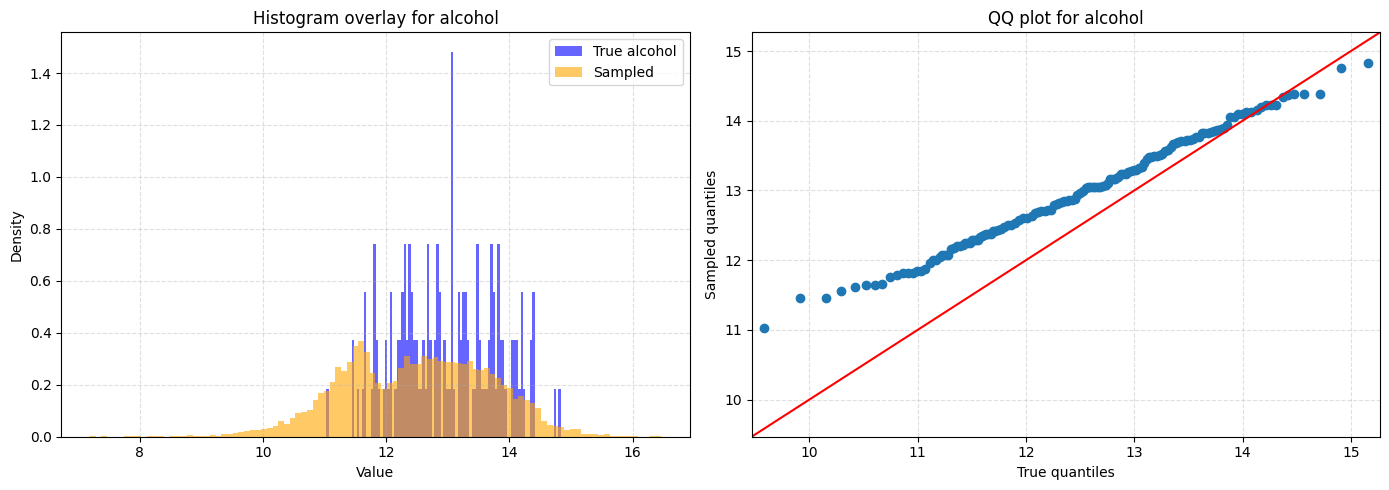

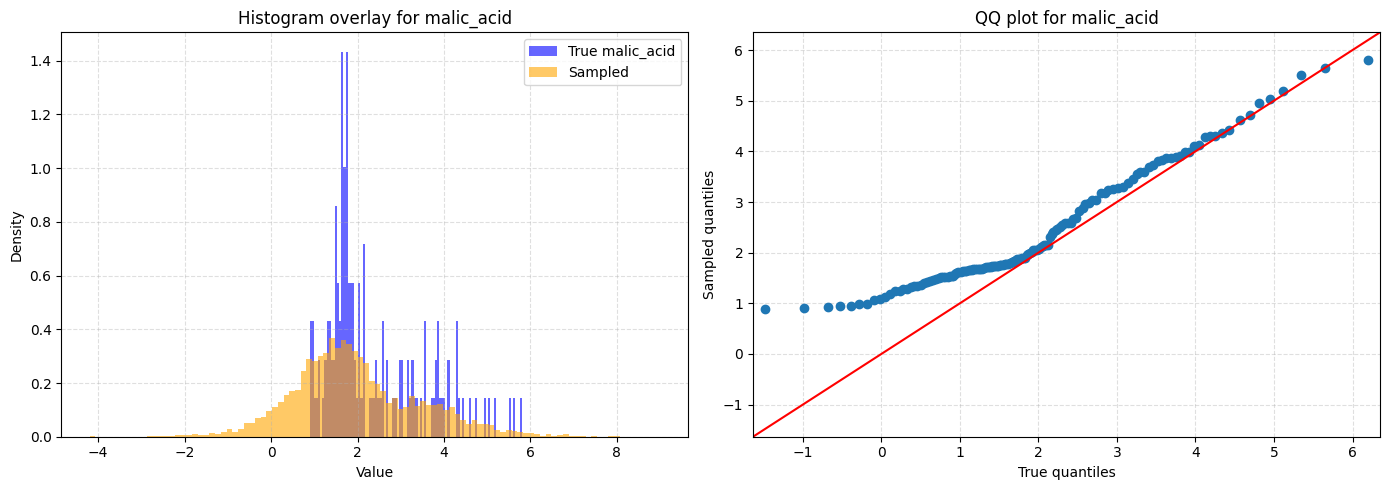

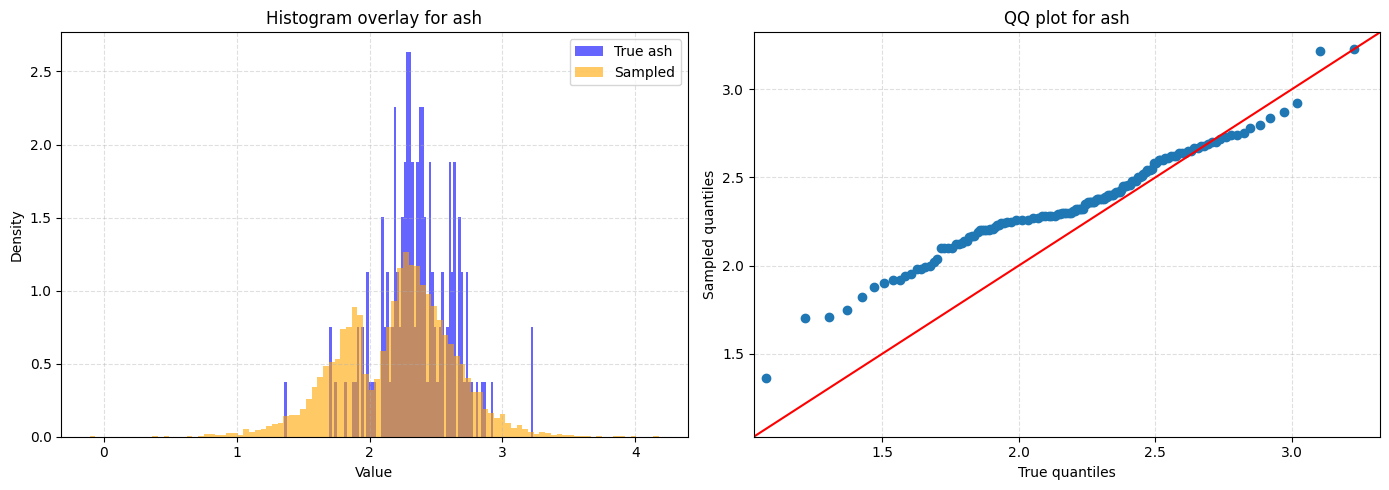

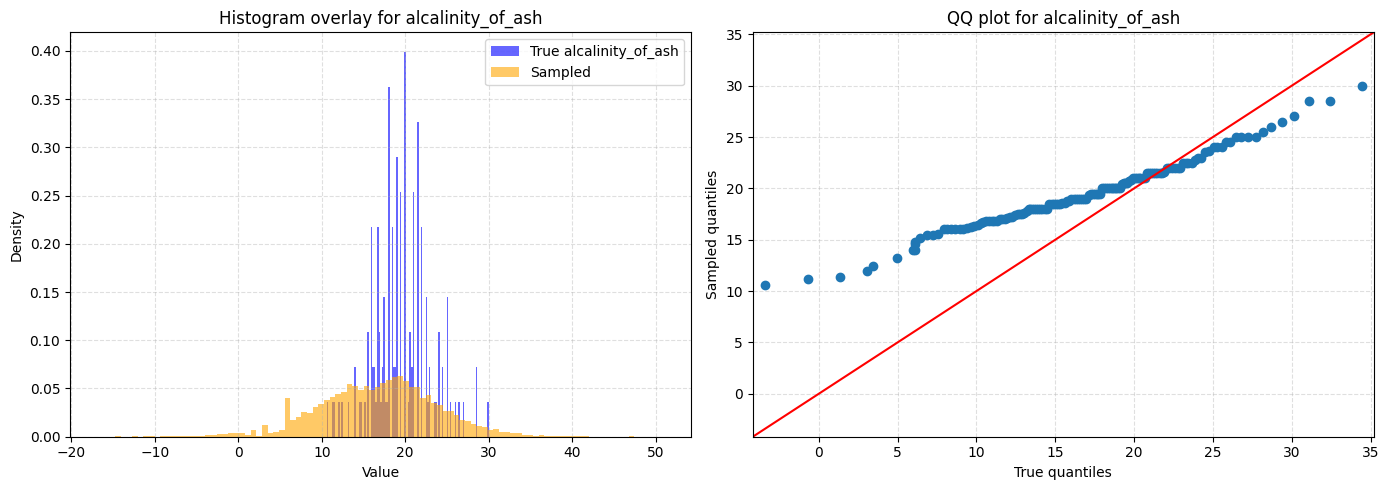

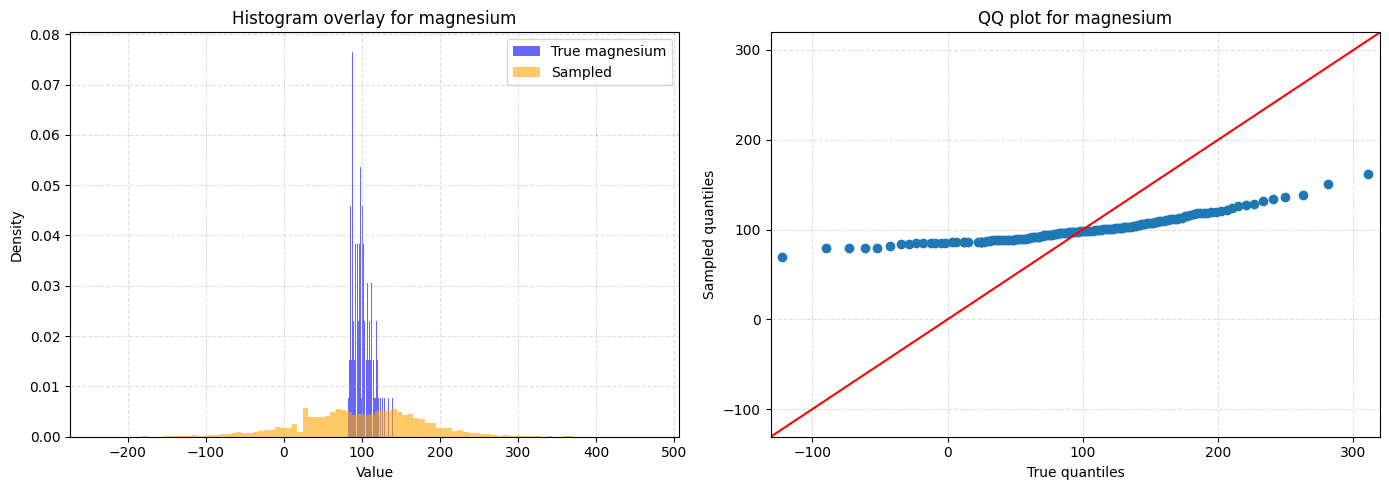

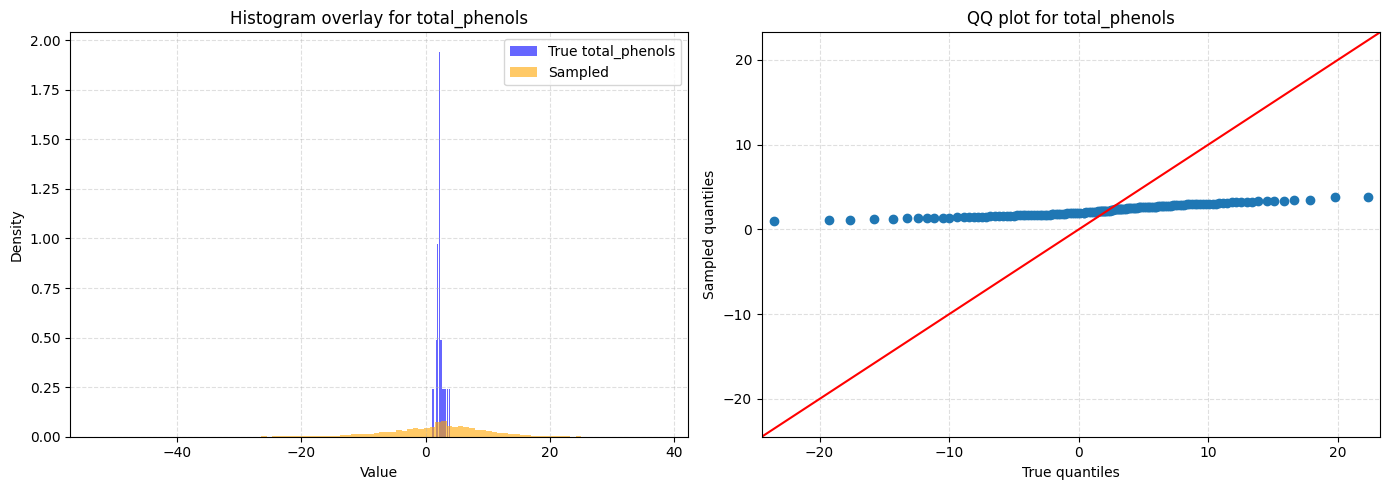

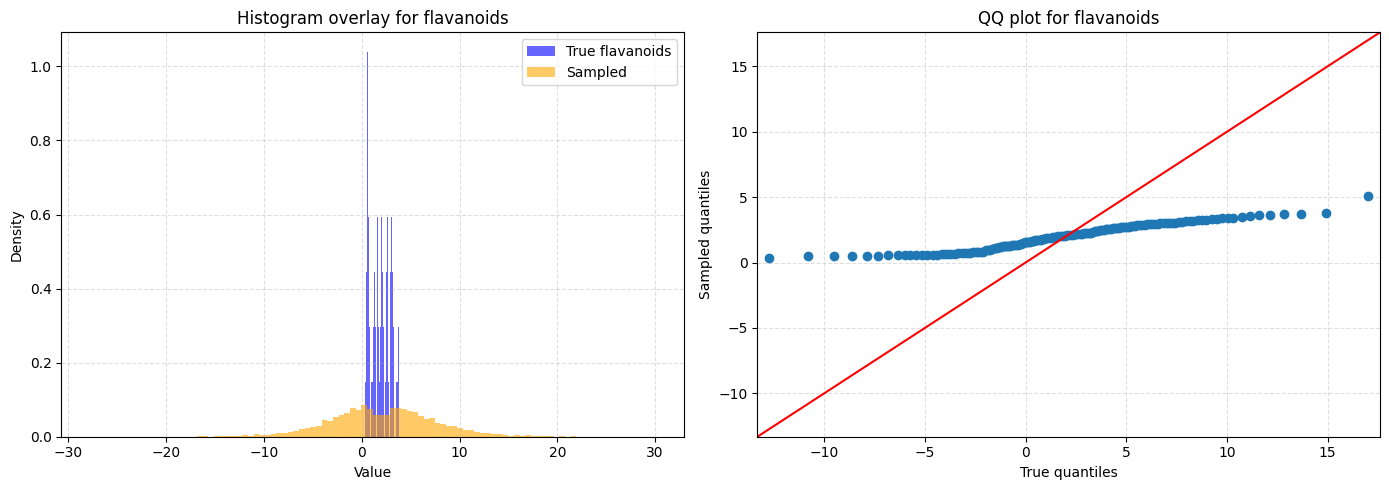

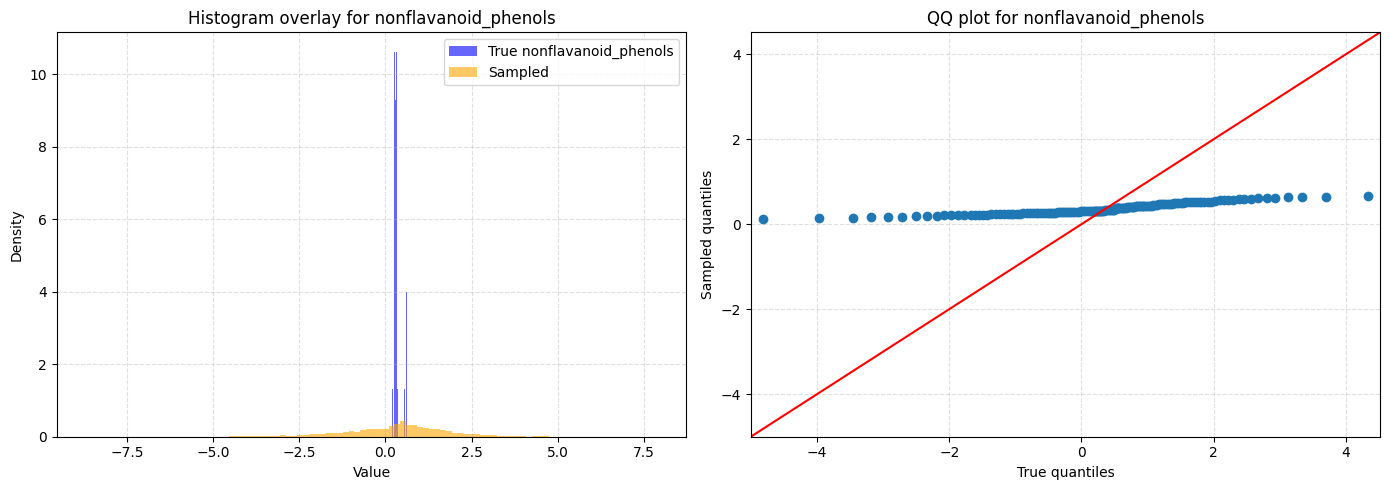

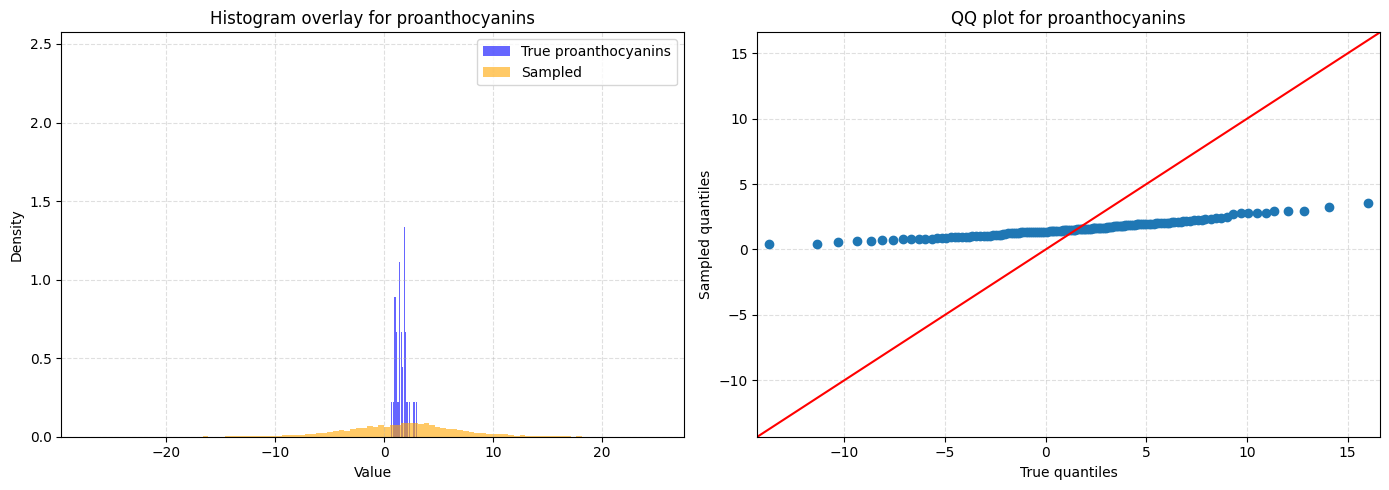

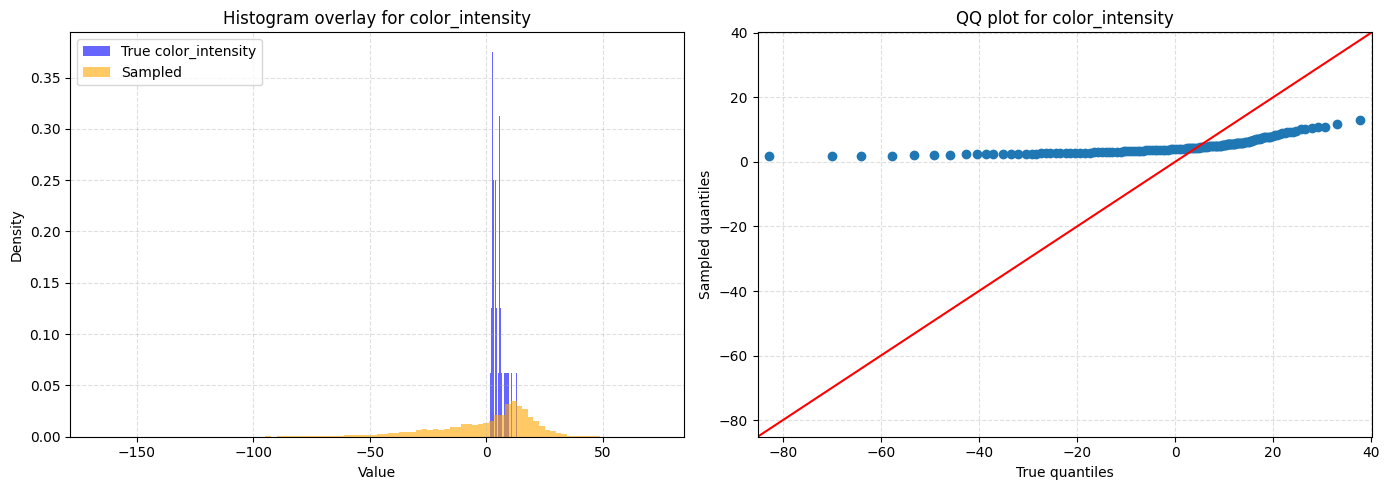

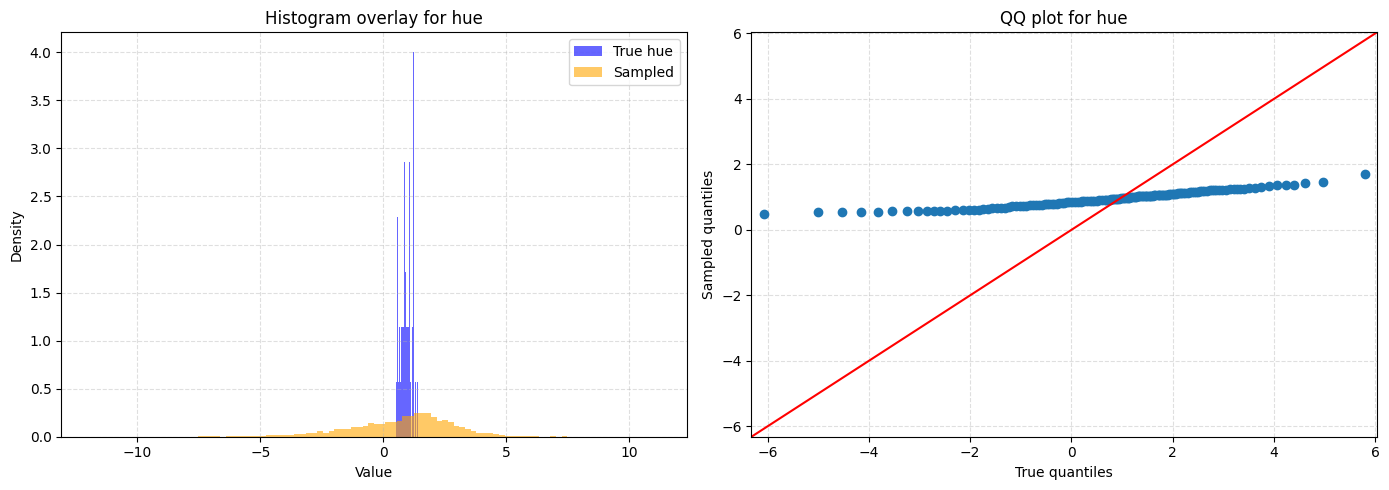

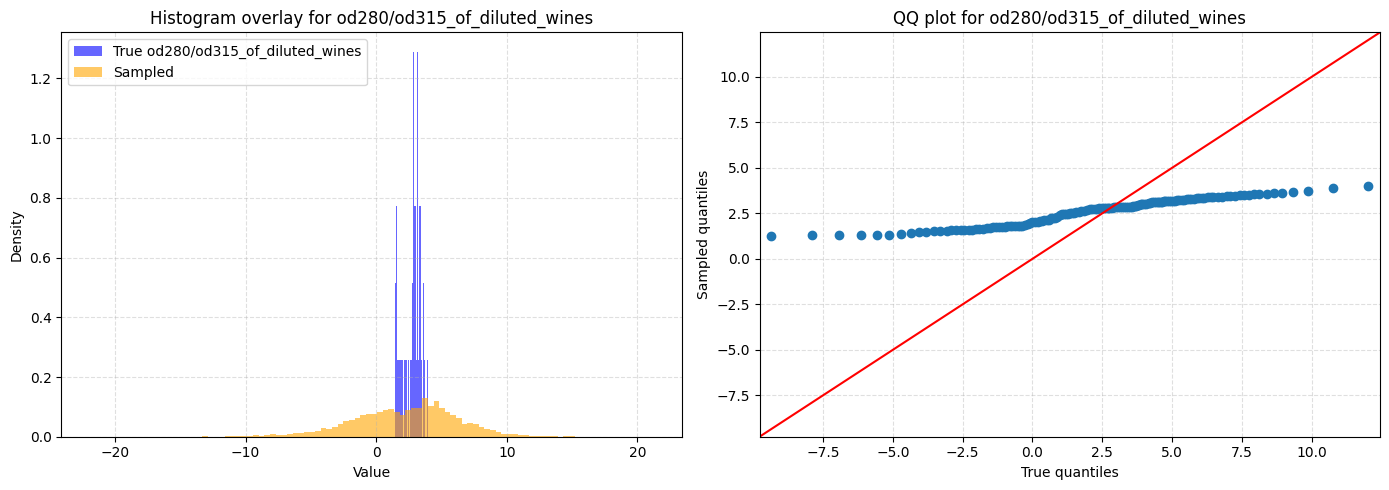

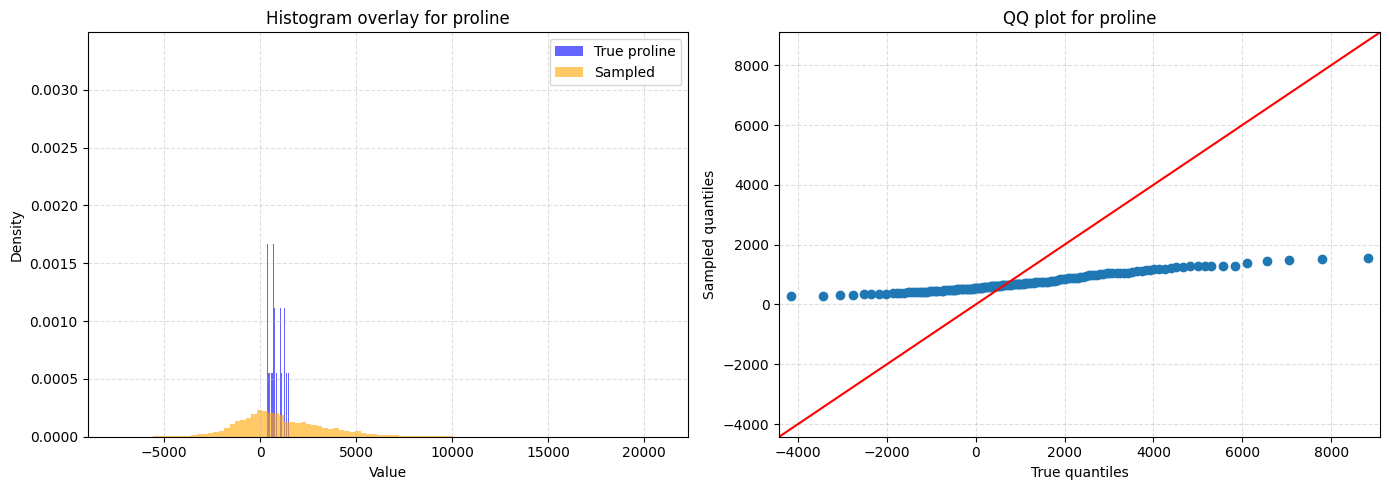

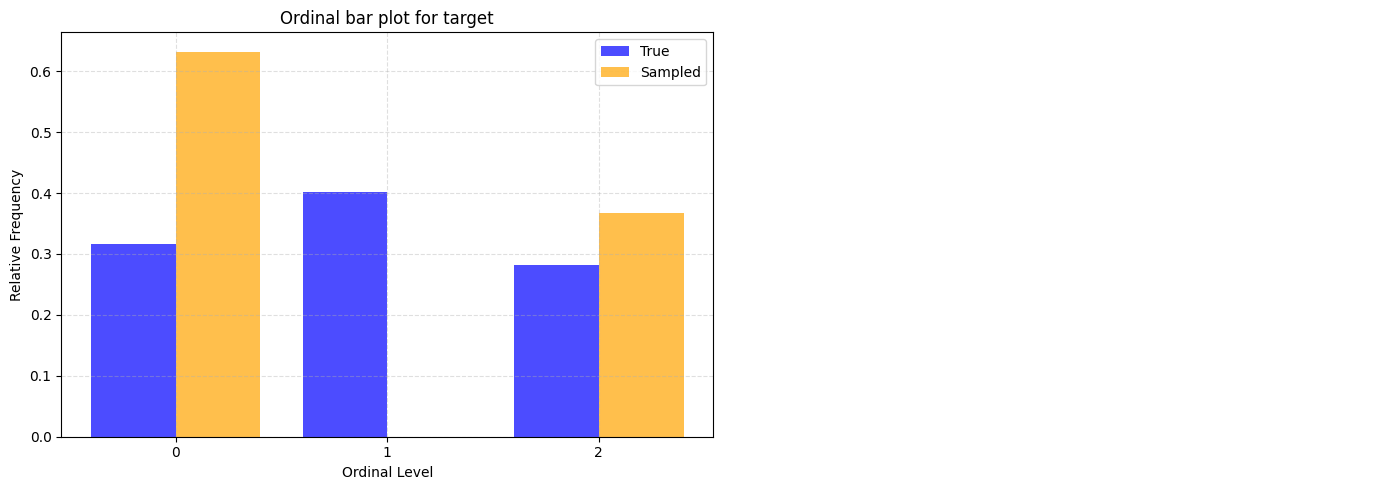

In [56]:
td_model.show_samples_vs_true(train_df)